# Hyperparameters cho Naive Bayes Classifier với Scikit-learn


## GaussianNB

Hàm `GaussianNB()` cung cấp các tham số `piors, var_Smoothing`. 
* `priors` là xác xuất tiền nghiệm của các lớp. 
* `var_smoothing` là giá trị phương sai lớn nhất của tất cả thuộc tính sẽ được thêm vào để tính toán ổn định

Hàm `fit(x,y)` nhận vào input, output vector tương ứng để học các xác suất tiền nghiệm cho việc dự đoán test, dựa vào phân phối *Gaussian*. Và đầu vào input không bị giới hạn 



## BernoulliNB

Hàm `BernoulliNB()` cung cấp các tham số `alpha, binarize, fit_prior, class_pior`. 
* `class_prior` là xác xuất tiền nghiệm của các lớp. 
* `alpha` là tham số smoothing được thêm vào. 
* `binarize` là ngưỡng để phân lớp nhị phân cho các đặc trưng. 
* `fit_prior`  để xác định có học xác suất tiền nghiệm hay là không. 

Hàm `fit(x,y)` nhận vào input, output vector tương ứng dể học các xác suất tiền nghiệm. `BernoulliNB` thường để sử dụng cho tình huống mà đặc trưng tham số rời rạc và chỉ gồm các giá trị nhị phân, tức chỉ chứa toàn 0,1. Ngoài ra nếu không phải thì hàm cũng có cài đặt để tự nhị phân hoá các đặc trưng đầu vào. 

## MultinomialNB

Hàm `MultinomialNB()` cung cấp các tham số `alpha, binarize, fit_prior, class_pior`. 
* `class_prior` là xác xuất tiền nghiệm của các lớp. 
* `alpha` là tham số smoothing được thêm vào. 
* `fit_prior`  để xác định có học xác suất tiền nghiệm hay là không. 

Hàm `fit(x,y)` nhận vào input, output vector tương ứng dể học các xác suất tiền nghiệm. `MultinomialNB` thường để sử dụng cho tình huống mà các đặc trưng đầu vào là rời rạc (ví dụ như đầu vào *words_count* cho *text_classification* ). Đầu vào thường là các số nguyên không âm, hoặc là giá trị phân số như khi áp dụng tf-idf vào dữ liệu đầu vào.

# Áp dụng

## Prerequisite

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 349 kB/s 


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import os
import warnings

warnings.filterwarnings('ignore')

In [ ]:
!gdown --id 1IrkpL6uynfZXTh2Fl4h4-tGj-JC6zqDE

Downloading...
From: https://drive.google.com/uc?id=1IrkpL6uynfZXTh2Fl4h4-tGj-JC6zqDE
To: /content/Archive.zip
100% 27.2M/27.2M [00:00<00:00, 103MB/s] 


In [ ]:
!unzip Archive.zip

Archive:  Archive.zip
  inflating: test_imdb.csv           
  inflating: __MACOSX/._test_imdb.csv  
  inflating: adult.csv               
  inflating: __MACOSX/._adult.csv    
  inflating: train_imdb.csv          
  inflating: __MACOSX/._train_imdb.csv  


In [ ]:
!rm -r __MACOSX

## Adult Dataset - Gaussian NB

Ta có 1 bộ dữ liệu adult.csv. Từ đây ta tiến hành đọc file để xem dữ liệu, xử lí và dùng Navie Bayes Classifier để phân loại


###Đọc dữ liệu

In [ ]:
data = '/content/adult.csv'
df = pd.read_csv(data, header=None, sep=',\s')

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Nhận thấy rằng dữ liệu chúng ta chưa có tên cột (nhãn) nên ta sẽ thêm nhãn phù hợp với dữ liệu

In [ ]:
#thêm nhãn phù hợp
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = col_names

In [ ]:
df.info

<bound method DataFrame.info of        age         workclass  fnlwgt  ... hours_per_week  native_country income
0       39         State-gov   77516  ...             40   United-States  <=50K
1       50  Self-emp-not-inc   83311  ...             13   United-States  <=50K
2       38           Private  215646  ...             40   United-States  <=50K
3       53           Private  234721  ...             40   United-States  <=50K
4       28           Private  338409  ...             40            Cuba  <=50K
...    ...               ...     ...  ...            ...             ...    ...
32556   27           Private  257302  ...             38   United-States  <=50K
32557   40           Private  154374  ...             40   United-States   >50K
32558   58           Private  151910  ...             40   United-States  <=50K
32559   22           Private  201490  ...             20   United-States  <=50K
32560   52      Self-emp-inc  287927  ...             40   United-States   >50K

[32561 

Ta có 32561 dòng và 15 cột, trong đó cột cuối là nhãn ta cần dự đoán (income)

###Kiểm tra dữ liệu phân loại

In [ ]:
#kiểm tra nếu dữ liệu của cột là 1 object ~ 1 phân loại (categorical value)
categorical = [var for var in df.columns if df[var].dtype=='O']

In [ ]:
print('Có {} loại dữ liệu phân loại'.format(len(categorical)))
print( categorical)

Có 9 loại dữ liệu phân loại
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [ ]:
#kiểm tra trường hợp NaN
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [ ]:
#kiểm tra mật độ dữ liệu
for var in categorical: 
    print(df[var].value_counts()/np.float(len(df)))

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital_status, dtype: float64


Có 1 số giá trị gán là "?". Có lẽ đây là encode cho NaN. Ta cần chuyển qua giá trị np.nan

In [ ]:
#Tìm cột (nhãn) có chứa giá trị "?" 
missing_cate = []
for var in categorical: 
    if (df[ df[var] == '?'].shape[0] > 0):
        print("giá trị bị thiếu của cột {} là : {}".format(var,df[ df[var] == '?'].shape[0]))
        missing_cate.append(var)

giá trị bị thiếu của cột workclass là : 1836
giá trị bị thiếu của cột occupation là : 1843
giá trị bị thiếu của cột native_country là : 583


In [ ]:
#Chuyển sang dữ liệu np.NaN
for var in missing_cate: 
    df[var].replace('?', np.NaN, inplace=True)

In [ ]:
#Kiểm tra lại dữ liệu NaN
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Phần xử lí dữ liệu NaN sẽ ở sau. Đừng lo lắng nhé !

###Kiểm tra số nhãn của các dữ liệu phân loại

In [ ]:
#kiểm tra số nhãn (unique) trong các nhãn dữ liệu phân loại
for var in categorical:
    print(var, 'chứa', len(df[var].unique()), 'nhãn')

workclass chứa 9 nhãn
education chứa 16 nhãn
marital_status chứa 7 nhãn
occupation chứa 15 nhãn
relationship chứa 6 nhãn
race chứa 5 nhãn
sex chứa 2 nhãn
native_country chứa 42 nhãn
income chứa 2 nhãn


Việc có nhãn như native_country có quá nhiều nhãn sẽ gây ảnh hưởng tới model

###Kiểm tra dữ liệu số học

In [ ]:
#kiểm tra dữ liệu số học
numerical = [var for var in df.columns if df[var].dtype!='O']
print('Có {} số cột mang giá trị số học\n'.format(len(numerical)))
print('Cột:', numerical)

Có 6 số cột mang giá trị số học

Cột: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [ ]:
#kiểm tra NaN trong dữ liệu số 
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

###Chia tập train_test

In [ ]:
#lấy các nhãn đặc trưng
X = df.drop(['income'], axis=1)
#Lấy nhãn output 
y = df['income']

In [ ]:
from sklearn.model_selection import train_test_split
#chia tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

###Xử lí dữ liệu

In [ ]:
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [ ]:
#lấy lại các dữ liệu phân loại và số học trong tập train
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

In [ ]:
#kiểm tra NaN
X_train[categorical].isnull().mean()

workclass         0.055985
education         0.000000
marital_status    0.000000
occupation        0.056072
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018164
dtype: float64

In [ ]:
X_train['workclass'].value_counts()[:3]

Private             15926
Self-emp-not-inc     1773
Local-gov            1475
Name: workclass, dtype: int64

In [ ]:
X_train['workclass'].mode()[0]

'Private'

In [ ]:
#thay thế NaN bằng những giá trị xuất hiện nhiều nhất
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)    

In [ ]:
#kiểm tra lại NaN
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [ ]:
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

###Encode dữ liệu

Do dữ liệu phân loại ta không thể nào đưa vào các model NBC. Ta cần encode thành các cột mang giá trị số

In [ ]:
import category_encoders as ce

In [ ]:
#tạo encoder dựa vào các dữ liệu phân loại
encoder = ce.OneHotEncoder(cols=categorical)
#fit và transform vào tập train
X_train = encoder.fit_transform(X_train)
#transform tập test
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16,education_num,marital_status_1,marital_status_2,marital_status_3,marital_status_4,marital_status_5,marital_status_6,marital_status_7,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,...,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,native_country_7,native_country_8,native_country_9,native_country_10,native_country_11,native_country_12,native_country_13,native_country_14,native_country_15,native_country_16,native_country_17,native_country_18,native_country_19,native_country_20,native_country_21,native_country_22,native_country_23,native_country_24,native_country_25,native_country_26,native_country_27,native_country_28,native_country_29,native_country_30,native_country_31,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#số cột đã tăng lên từ 14 -> 108
X_train.shape

(22792, 105)

In [ ]:
X_test.shape

(9769, 105)

In [ ]:
X_test1 = X_test.copy
X_train1 = X_train.copy

###Scale dữ liệu

In [ ]:
from sklearn.preprocessing import RobustScaler
#scale các dữ liệu số học
cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16,education_num,marital_status_1,marital_status_2,marital_status_3,marital_status_4,marital_status_5,marital_status_6,marital_status_7,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,...,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,native_country_7,native_country_8,native_country_9,native_country_10,native_country_11,native_country_12,native_country_13,native_country_14,native_country_15,native_country_16,native_country_17,native_country_18,native_country_19,native_country_20,native_country_21,native_country_22,native_country_23,native_country_24,native_country_25,native_country_26,native_country_27,native_country_28,native_country_29,native_country_30,native_country_31,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Huấn luyện

In [ ]:
from sklearn.naive_bayes import GaussianNB
#mô hình Gaussian Navie Bayes
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
#dự đoán bằng mô hình GNB
y_pred = gnb.predict(X_test)

y_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

In [ ]:
from sklearn.metrics import accuracy_score
#tính accuracy_score
print('Model accuracy_score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy_score: 0.8083


In [ ]:
y_pred_train = gnb.predict(X_train)
#kiểm tra accyracy trên tập train
y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8067


In [ ]:
#kiểm tra tình trạng overfiting hay underfiting
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8067
Test set score: 0.8083


###Kiểm tra lại model

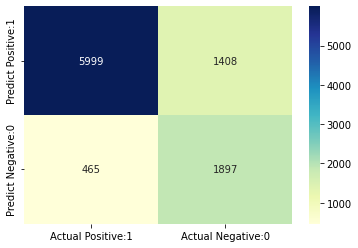

In [ ]:
from sklearn.metrics import confusion_matrix
#sử dụng Confusion matrix gồm các chỉ số TP, FP, TN, FN
cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
#tính precision,recall và f1
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7407
        >50K       0.57      0.80      0.67      2362

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.84      0.81      0.82      9769



In [ ]:
from sklearn.model_selection import cross_val_score
#thử sử dụng kfold validation
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

In [ ]:
print('Cross-validation scores:{}'.format(scores))
print('Avg cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.81359649 0.80438596 0.81175954 0.8056165  0.79596314 0.79684072
 0.81044318 0.81175954 0.80210619 0.81044318]
Avg cross-validation score: 0.8063


Text(0, 0.5, 'Tần suất')

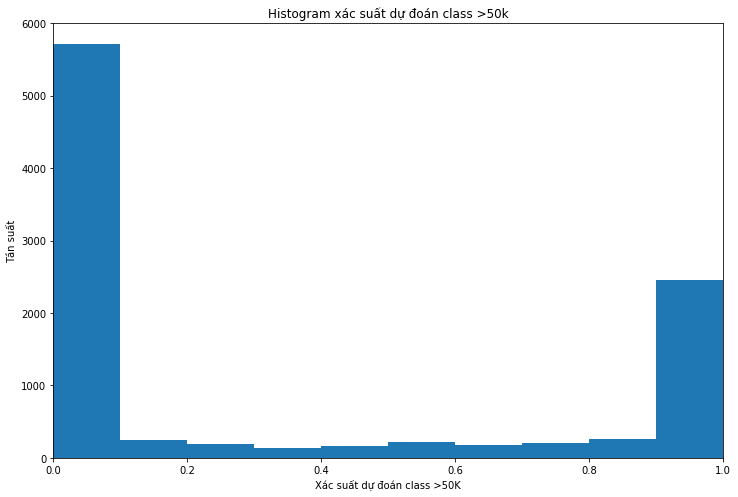

In [ ]:
#lấy dữ liệu xác suất dự đoán
y_pred1 = gnb.predict_proba(X_test)[:, 1]
#vẽ biểu đồ về tần suất xác suất ở trên
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = 10
plt.hist(y_pred1, bins = 10)
plt.title('Histogram xác suất dự đoán class >50k')
plt.xlim(0,1)
plt.xlabel('Xác suất dự đoán class >50K')
plt.ylabel('Tần suất')

###ROC - AUC 

Sử dụng đường cong ROC để xem chất lượng dự đoán của 1 model

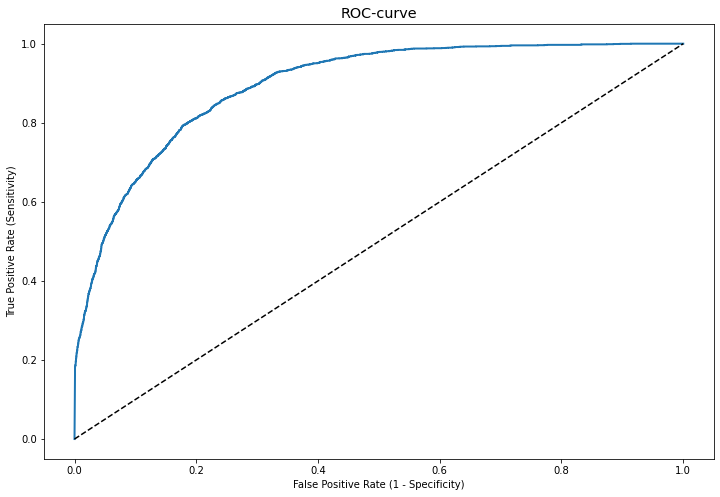

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC-curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

Tiếp theo ta tính AUC (diện tích dưới đường cong)

In [ ]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8941


In [ ]:
# Tính AUC theo KFold

from sklearn.model_selection import cross_val_score
cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=10, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8938


###Thử sử dụng Bernoulli 

In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNL = BernoulliNB()

In [ ]:
BNL.fit(X_train,y_train)
y_pred1 = BNL.predict(X_test)

In [ ]:
print('Model accuracy_score: {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))

Model accuracy_score: 0.7935


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

       <=50K       0.92      0.80      0.85      7407
        >50K       0.55      0.77      0.64      2362

    accuracy                           0.79      9769
   macro avg       0.73      0.78      0.75      9769
weighted avg       0.83      0.79      0.80      9769



In [ ]:
scores = cross_val_score(BNL, X_train, y_train, cv = 10, scoring='accuracy')
print(scores)
print(np.mean(scores))

[0.80482456 0.79254386 0.80298376 0.80298376 0.78367705 0.78806494
 0.7937692  0.79684072 0.77577885 0.80122861]
0.7942695318814808


Rõ ràng kết quả không được tốt như GaussianNB

## Imdb-sentiment-analysis : Bernoulli

In [ ]:
import numpy
import pandas
import warnings
warnings.filterwarnings('ignore')

### Đọc dữ liệu và quan sát dữ liệu

In [ ]:
#đọc dữ liệu
data = pd.read_csv("/content/train_imdb.csv", index_col=0)

In [ ]:
#kiểm tra NaN
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 937.5+ KB


In [ ]:
data.head()

,review,label
0,I think they really let the quality of the DVD...,0
1,I'm sorry but this is just awful. I have told ...,0
2,"The Japenese sense of pacing, editing and musi...",0
3,"In the '60's/'70's, David Jason was renowned f...",1
4,"""Hail The Woman"" is one of the most moving fil...",1


In [ ]:
#kiểm tra tính cân bằng của các class
data['label'].value_counts()

0    20067
1    19933
Name: label, dtype: int64

Do dữ liệu khá lớn nên chúng ta chỉ lấy 2000 mẫu với tỉ lệ 50:50

In [ ]:
from sklearn.utils import shuffle

pos_data = data[ data['label'] == 1] 
neg_data = data[ data['label'] == 0] 
data = shuffle(pd.concat([pos_data[:1000], neg_data[:1000]]))

In [ ]:
data

,review,label
1442,Granting the budget and time constraints of se...,0
120,Don't let the wildly varying reviews of the mo...,1
1099,I am writing this after just seeing The Perfec...,1
948,I was expecting to this to be hilarious and it...,0
1478,"You know the saying ""Curiosity Killed The Cat""...",1
...,...,...
481,This movie includes 2 well known actors I have...,0
1456,Monstrous mother-son-duo (Alice Krige and Bria...,1
856,A man comes to the office of the psychiatric D...,0
521,Despite all it's trappings of style and cinema...,1


In [ ]:
#thay đổi nhãn cột
data.columns = ["comment_text", "sentiment_score"]
data.head()

,comment_text,sentiment_score
1442,Granting the budget and time constraints of se...,0
120,Don't let the wildly varying reviews of the mo...,1
1099,I am writing this after just seeing The Perfec...,1
948,I was expecting to this to be hilarious and it...,0
1478,"You know the saying ""Curiosity Killed The Cat""...",1


In [ ]:
data.describe()

,sentiment_score
count,2000.000000
mean,0.500000
std,0.500125
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
# gán nhãn 
def label(score):
    if score == 0:
        return 'Negative comment'
    else:
        return 'Positive comment'

In [ ]:
data['label_class'] = data['sentiment_score'].apply(label) 
data.head()

,comment_text,sentiment_score,label_class
1442,Granting the budget and time constraints of se...,0,Negative comment
120,Don't let the wildly varying reviews of the mo...,1,Positive comment
1099,I am writing this after just seeing The Perfec...,1,Positive comment
948,I was expecting to this to be hilarious and it...,0,Negative comment
1478,"You know the saying ""Curiosity Killed The Cat""...",1,Positive comment


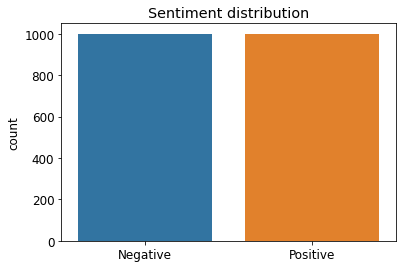

In [ ]:
import seaborn as sns
#quan sát độ phân bổ 2 class
f = sns.countplot(x='label_class', data=data)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("");

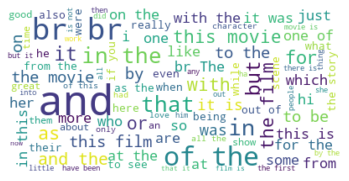

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

text = " ".join(review for review in data.comment_text)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords="english").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

### Xây dựng model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

In [ ]:
# Create future matrix and target vector 
X = numpy.array(data["comment_text"])
y = numpy.array(data["sentiment_score"])

In [ ]:
# split train-test (20:80)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, 
                                                y,
                                                test_size = 0.20,
                                                random_state = 0)

In [ ]:
Xtrain.shape

(1600,)

In [ ]:
Xtest.shape

(400,)

### Tạo pipeline
Pipeline bao gồm
- Count vectorizer
- Term frequency inverse document frequency transformer
- Grid Search CV

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV

In [ ]:
text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB())
])

text_clf = text_clf.fit(Xtrain, ytrain)

In [ ]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False), 
              'clf__alpha': (.01, .005, .001, .0001, .00001, .1, .5, .05)}

### Sử dụng các tham số khác nhau để tìm model tốt nhất bằng `GridSearchCV`

In [ ]:
grid_clf = GridSearchCV(text_clf, parameters, n_jobs = -1)
grid_clf = grid_clf.fit(Xtrain, ytrain)

grid_clf.best_params_

{'clf__alpha': 0.5, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}

### Dự đoán trên test data (`Xtest`)

In [ ]:
y_prediction = text_clf.predict(Xtest)

### Kiểm tra độ chính xác dựa trên `ytest`

In [ ]:
accuracy = accuracy_score(y_prediction, ytest)

In [ ]:
print('{:.2%}'.format(accuracy))

77.25%


### Kfold CrossValidate Model
Dùng cross_validate để đánh giá lại model

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scoring = "accuracy"
kfold = 5
results = cross_val_score(grid_clf, Xtrain, ytrain, cv= kfold, scoring = scoring)
print(results)

[0.784375 0.771875 0.784375 0.753125 0.78125 ]


### Tạo confusion maxtrix
Kiểm tra model bằng cách visualize lại các nhãn dự đoán/ nhãn thực 

In [ ]:
import seaborn
import matplotlib.pyplot as plt
seaborn.set_style = "whitegrid"
seaborn.set(rc = {"figure.figsize":(14,8)},
           font_scale = 1.6)

Text(0.5, 1.0, 'Confusion Matrix\n Predicted vs True counts')

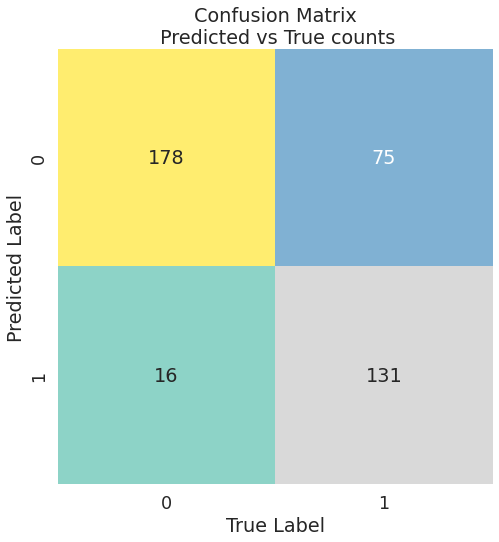

In [ ]:
from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(ytest, y_prediction)

seaborn.heatmap(confusion_matrix.T, 
               square  = True,
               annot = True,
               fmt = "d",
               cbar = False,
               cmap = "Set3")

plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix\n Predicted vs True counts")

### Tính ROC curve

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import seaborn
from matplotlib import pyplot as plt

In [ ]:
target_prob = text_clf.predict_proba(Xtest)[:,1]
fpr, tpr, thresh = roc_curve(ytest, target_prob)
auc_score = roc_auc_score(ytest, target_prob)

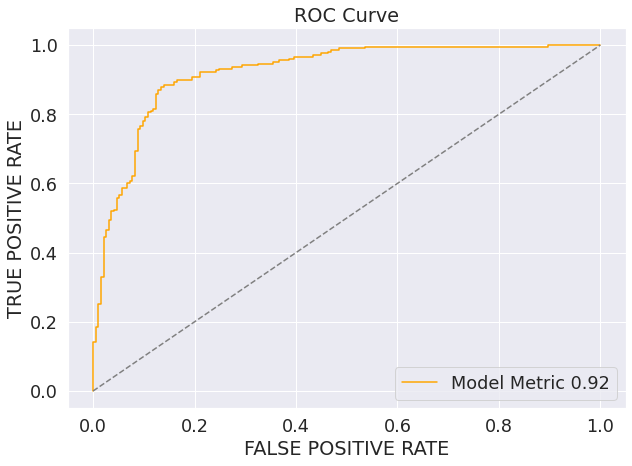

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('ROC Curve')
plt.plot(fpr, tpr, color='orange', label='Model Metric {:.2}'.format(auc_score))
plt.plot([0, 1], ls='--', color='grey')
plt.ylabel('TRUE POSITIVE RATE')
plt.xlabel('FALSE POSITIVE RATE')
plt.legend()
plt.show()

### Classification Report 

In [ ]:
print(classification_report(ytest, y_prediction))

              precision    recall  f1-score   support

           0       0.70      0.92      0.80       194
           1       0.89      0.64      0.74       206

    accuracy                           0.77       400
   macro avg       0.80      0.78      0.77       400
weighted avg       0.80      0.77      0.77       400



## Imdb-sentiment-analysis : Multinomial

In [ ]:
import numpy
import pandas
import warnings
warnings.filterwarnings('ignore')

### Import and inspect data

In [ ]:
data = pd.read_csv("/content/train_imdb.csv", index_col=0)

In [ ]:
# check null composition
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 937.5+ KB


In [ ]:
data.head()

,review,label
0,I think they really let the quality of the DVD...,0
1,I'm sorry but this is just awful. I have told ...,0
2,"The Japenese sense of pacing, editing and musi...",0
3,"In the '60's/'70's, David Jason was renowned f...",1
4,"""Hail The Woman"" is one of the most moving fil...",1


In [ ]:
# check class balance
data['label'].value_counts()

0    20067
1    19933
Name: label, dtype: int64

In [ ]:
pos_data = data[ data['label'] == 1] 
neg_data = data[ data['label'] == 0] 
data = pd.concat([pos_data[:1000], neg_data[:1000]])

In [ ]:
# Add header
data.columns = ["comment_text", "sentiment_score"]
data.head()

,comment_text,sentiment_score
3,"In the '60's/'70's, David Jason was renowned f...",1
4,"""Hail The Woman"" is one of the most moving fil...",1
5,"Budget limitations, time restrictions, shootin...",1
6,"""Jaded"" should not be considered as en erotic ...",1
7,I give it 8 out of 10 because it is a cult cla...,1


In [ ]:
# Apply label
def label(score):
    if score == 0:
        return 'Negative comment'
    else:
        return 'Positive comment'

In [ ]:
data['label_class'] = data['sentiment_score'].apply(label) 
data.head()

,comment_text,sentiment_score,label_class
3,"In the '60's/'70's, David Jason was renowned f...",1,Positive comment
4,"""Hail The Woman"" is one of the most moving fil...",1,Positive comment
5,"Budget limitations, time restrictions, shootin...",1,Positive comment
6,"""Jaded"" should not be considered as en erotic ...",1,Positive comment
7,I give it 8 out of 10 because it is a cult cla...,1,Positive comment


### Xây dựng model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Create future matrix and target vector 
X = numpy.array(data["comment_text"])
y = numpy.array(data["sentiment_score"])

In [ ]:
# split train-test (20:80)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, 
                                                y,
                                                test_size = 0.20,
                                                random_state = 0)

### Tạo pipeline 
Pipeline bao gồm
- Count Vectorizer 
- Term Frequency Inverse Document Frequency Transformer (TF-IDF)
- Grid Search CV

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV

In [ ]:
text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

text_clf = text_clf.fit(Xtrain, ytrain)

In [ ]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 
              'tfidf__use_idf': (True, False), 
              'clf__alpha': (.01, .005, .001, .0001, .00001, .1, .5, .05)}

### Fit model bằng các parameter trong `GridSearchCV`

In [ ]:
grid_clf = GridSearchCV(text_clf, parameters, n_jobs = -1)
grid_clf = grid_clf.fit(Xtrain, ytrain)

grid_clf.best_params_

{'clf__alpha': 0.5, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}

### Dự doán bằng model lên tập test (`Xtest`)

In [ ]:
y_prediction = text_clf.predict(Xtest)

### Kiểm tra lại accuracy trên `ytest`

In [ ]:
accuracy = accuracy_score(y_prediction, ytest)

In [ ]:
print('{:.2%}'.format(accuracy))

85.25%


### Kfold Cross Validate Model
Kiểm tra model bằng cách dùng Cross Validate với kfold = 10

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scoring = "accuracy"
kfold = 5
results = cross_val_score(grid_clf, Xtrain, ytrain, cv= kfold, scoring = scoring)
print(results)

[0.80625  0.825    0.809375 0.81875  0.790625]


### Tạo confusion matrix
Kiểm tra model bằng cách visualize lại các nhãn dự đoán và nhãn thực

In [ ]:
import seaborn
import matplotlib.pyplot as plt
seaborn.set_style = "whitegrid"
seaborn.set(rc = {"figure.figsize":(14,8)},
           font_scale = 1.6)

Text(0.5, 1.0, 'Confusion Matrix\n Predicted vs True counts')

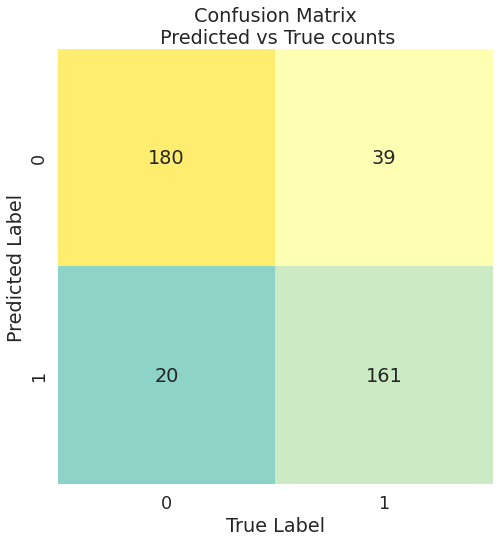

In [ ]:
from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(ytest, y_prediction)

seaborn.heatmap(confusion_matrix.T, 
               square  = True,
               annot = True,
               fmt = "d",
               cbar = False,
               cmap = "Set3")

plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix\n Predicted vs True counts")

### Tính ROC curve

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import seaborn
from matplotlib import pyplot as plt

In [ ]:
target_prob = text_clf.predict_proba(Xtest)[:,1]
fpr, tpr, thresh = roc_curve(ytest, target_prob)
auc_score = roc_auc_score(ytest, target_prob)

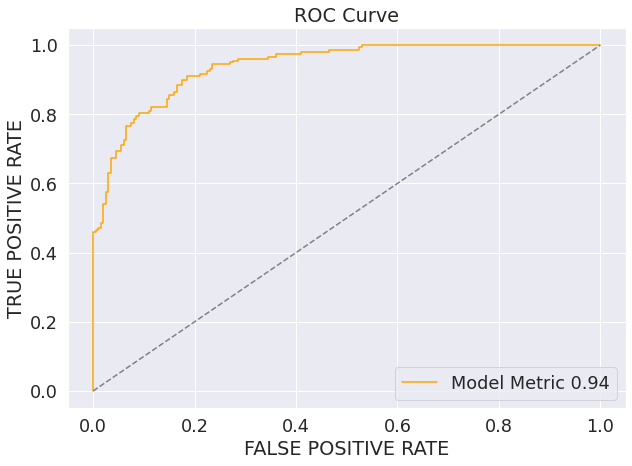

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('ROC Curve')
plt.plot(fpr, tpr, color='orange', label='Model Metric {:.2}'.format(auc_score))
plt.plot([0, 1], ls='--', color='grey')
plt.ylabel('TRUE POSITIVE RATE')
plt.xlabel('FALSE POSITIVE RATE')
plt.legend()
plt.show()

### Classification Report 

In [ ]:
print(classification_report(ytest, y_prediction))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       200
           1       0.89      0.81      0.85       200

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



###Thử sử dụng Gausian

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, 
                                                y,
                                                test_size = 0.20,
                                                random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB

vectorizer = CountVectorizer(stop_words = 'english')
vectorizer.fit_transform(Xtrain)

Xtrain = vectorizer.transform(Xtrain)
Xtest = vectorizer.transform(Xtest)


In [ ]:
clf = BernoulliNB().fit(Xtrain, ytrain)

In [ ]:
y_G_prediction = clf.predict(Xtest)

In [ ]:
accuracy = accuracy_score(y_G_prediction, ytest)
print('{:.2%}'.format(accuracy))
print(classification_report(y_G_prediction, ytest))

76.75%
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       257
           1       0.62      0.87      0.73       143

    accuracy                           0.77       400
   macro avg       0.77      0.79      0.76       400
weighted avg       0.81      0.77      0.77       400



Text(0.5, 1.0, 'Confusion Matrix\n Predicted vs True counts')

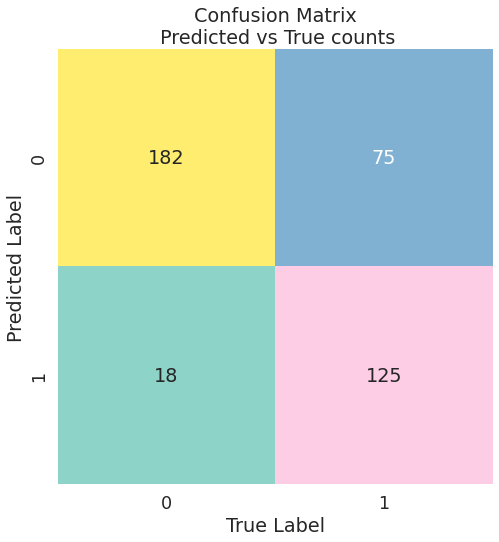

In [ ]:
import seaborn
import matplotlib.pyplot as plt
seaborn.set_style = "whitegrid"
seaborn.set(rc = {"figure.figsize":(14,8)},
           font_scale = 1.6)
from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(ytest, y_G_prediction)

seaborn.heatmap(confusion_matrix.T, 
               square  = True,
               annot = True,
               fmt = "d",
               cbar = False,
               cmap = "Set3")

plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix\n Predicted vs True counts")

In [ ]:
scoring = "accuracy"
kfold = 5
results = cross_val_score(clf, Xtrain, ytrain, cv= kfold, scoring = scoring)
print(results)

[0.709375 0.809375 0.75625  0.709375 0.7375  ]


##Nhận xét


Trong bài toán Imdb-sentiment-analysis, chúng ta đều áp dụng được Bernoulli và Multinomial để giải quyết bài toán phân lớp nhưng với Multinomail lại cho kết quả tốt hơn.
-> Do đó việc sử dụng mô hình phân lớp phù hợp cũng là vấn đề lớn song song với việc xử lý dữ liệu.

Cả 3 phương pháp đều thể hiện được khả năng phân loại tốt của mình.

Tuy nhiên, do 1 số đặc thù về dữ liệu, ví dụ ở trên về chữ, chúng ta phải dùng kĩ thuật trích xuất, thì sử dụng Multinomial sẽ tốt hơn Bernoulli. Sử dụng Gaussian thì kết quả lại không tốt hơn

Ở data Adult, sử dụng Gaussian cho kết quả phân loại rất tốt sau khi lọc, xử lý dữ liệu. Còn khi dùng qua Bernoulli thì kết quả tại không tốt như sử dụng Gaussian

##References
